In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

In [3]:
from sklearn.datasets import fetch_california_housing

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

from sklearn.tree import plot_tree

In [5]:
df = fetch_california_housing(as_frame=True)
data = df.frame

In [6]:
def zero(d):
    if d < 0:
        return 1
    return d

data.Population = data.Population.apply(zero)

In [7]:
cols_i16 = ['HouseAge', 'Population']
for col in cols_i16:
    data[col] = data[col].astype(np.int16)
cols_f16 = ['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
for col in cols_f16:
    data[col] = data[col].astype(np.float16)

In [8]:
y = data.MedHouseVal
del data['MedHouseVal']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

## Линейная регрессия

In [10]:
lreg = LinearRegression()

In [11]:
lreg.fit(X_train, y_train)

LinearRegression()

In [12]:
lreg.score(X_test, y_test)

0.5758705326700009

## Деревья решений

In [88]:
tree = DecisionTreeRegressor(random_state=1).fit(data, y)

In [89]:
tree.score(X_test, y_test)

1.0

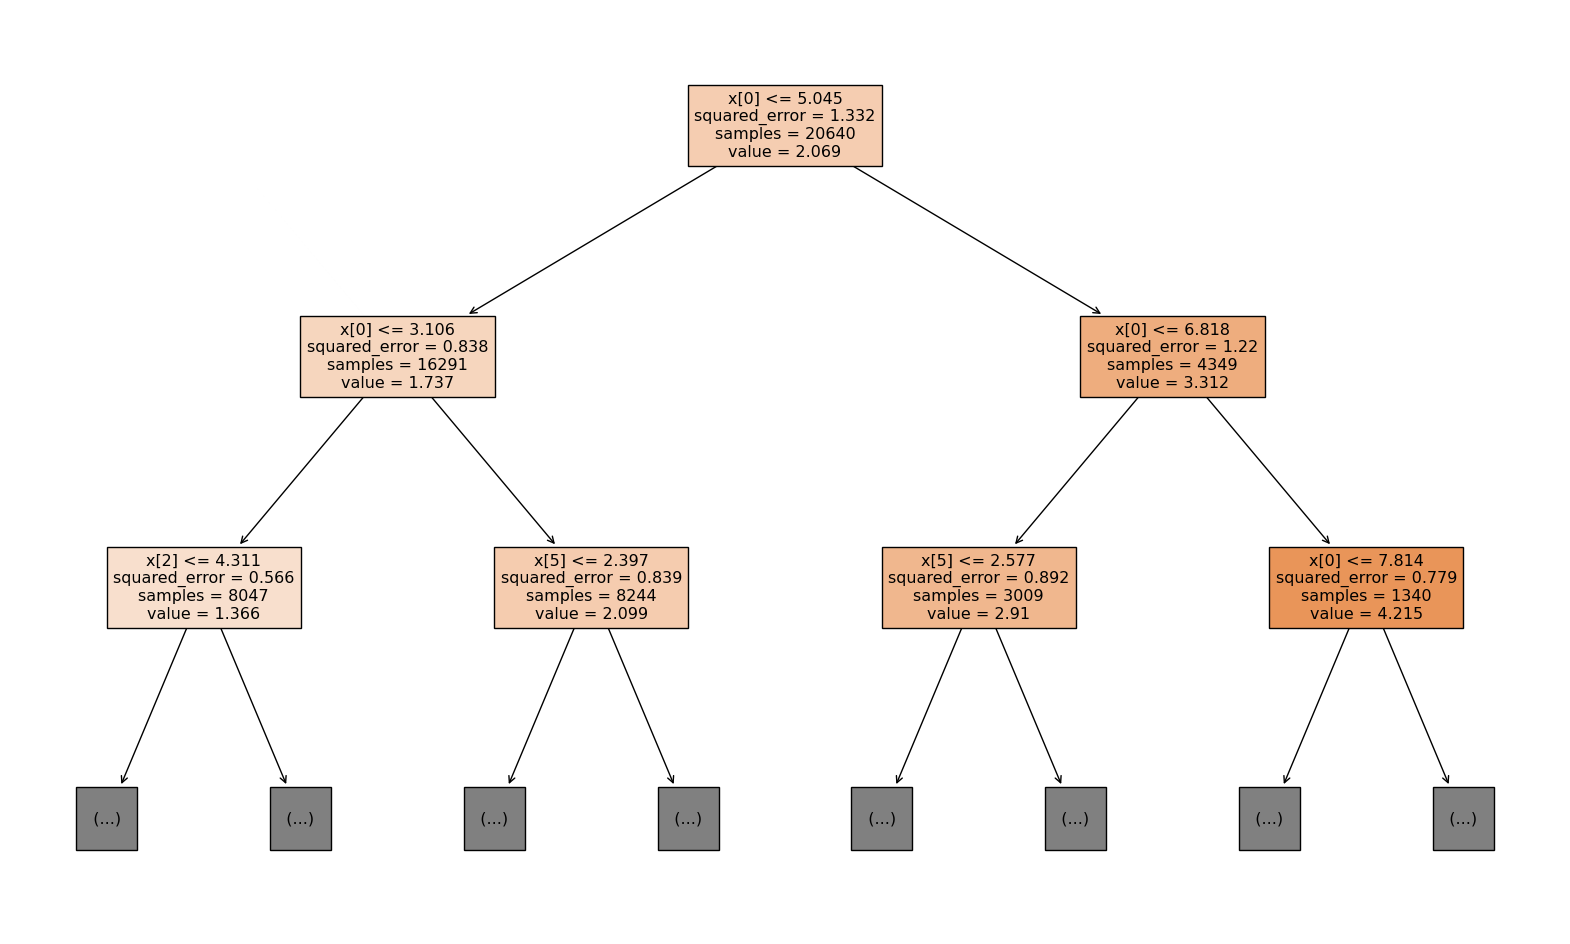

In [25]:
plt.figure(figsize=(20, 12))
plot_tree(tree, max_depth=2, filled=True);

In [27]:
tree_depth = DecisionTreeRegressor(random_state=1, max_depth=3).fit(data, y)

In [30]:
tree_depth.score(X_test, y_test)

0.5168057223726297

In [63]:
res = {}
for i in range(1, 20):
    tree_depth = DecisionTreeRegressor(random_state=1, max_depth=i).fit(data, y)
    res[f'd={i}'] = tree_depth.score(X_test, y_test)
    print(f'{i}: ',res[f'd={i}'])

1:  0.2822874956720264
2:  0.4283852842220788
3:  0.5168057223726297
4:  0.5679642156608831
5:  0.6201605574196151
6:  0.65343071445077
7:  0.6921532874630023
8:  0.7333090952328885
9:  0.7771988782350479
10:  0.8085037628962305
11:  0.8486667516928841
12:  0.8827288017672209
13:  0.9096315269717133
14:  0.9319348871427308
15:  0.9516077366235731
16:  0.9658130702845545
17:  0.9797418175370357
18:  0.9870786895523233
19:  0.990858777898916


In [65]:
v = list(res.values())
for i in range(len(v)):
    try:
        print(f'{i+1}->{i+2}: ', v[i]/v[i+1])
    except:
        pass
    

1->2:  0.6589570325335592
2->3:  0.8289097153479319
3->4:  0.9099265554455304
4->5:  0.9158341478924227
5->6:  0.9490838794452453
6->7:  0.9440549171496896
7->8:  0.9438765889616907
8->9:  0.9435282471047445
9->10:  0.961280471288047
10->11:  0.9526751946903326
11->12:  0.9614127804529039
12->13:  0.9704245901699832
13->14:  0.9760676840423922
14->15:  0.9793267238971342
15->16:  0.9852918394893991
16->17:  0.9857832471747542
17->18:  0.9925670849822368
18->19:  0.996185038240658


In [77]:
tree_depth = DecisionTreeRegressor(random_state=1, max_depth=11).fit(data, y)
tree_depth.score(X_test, y_test)

0.8486667516928841

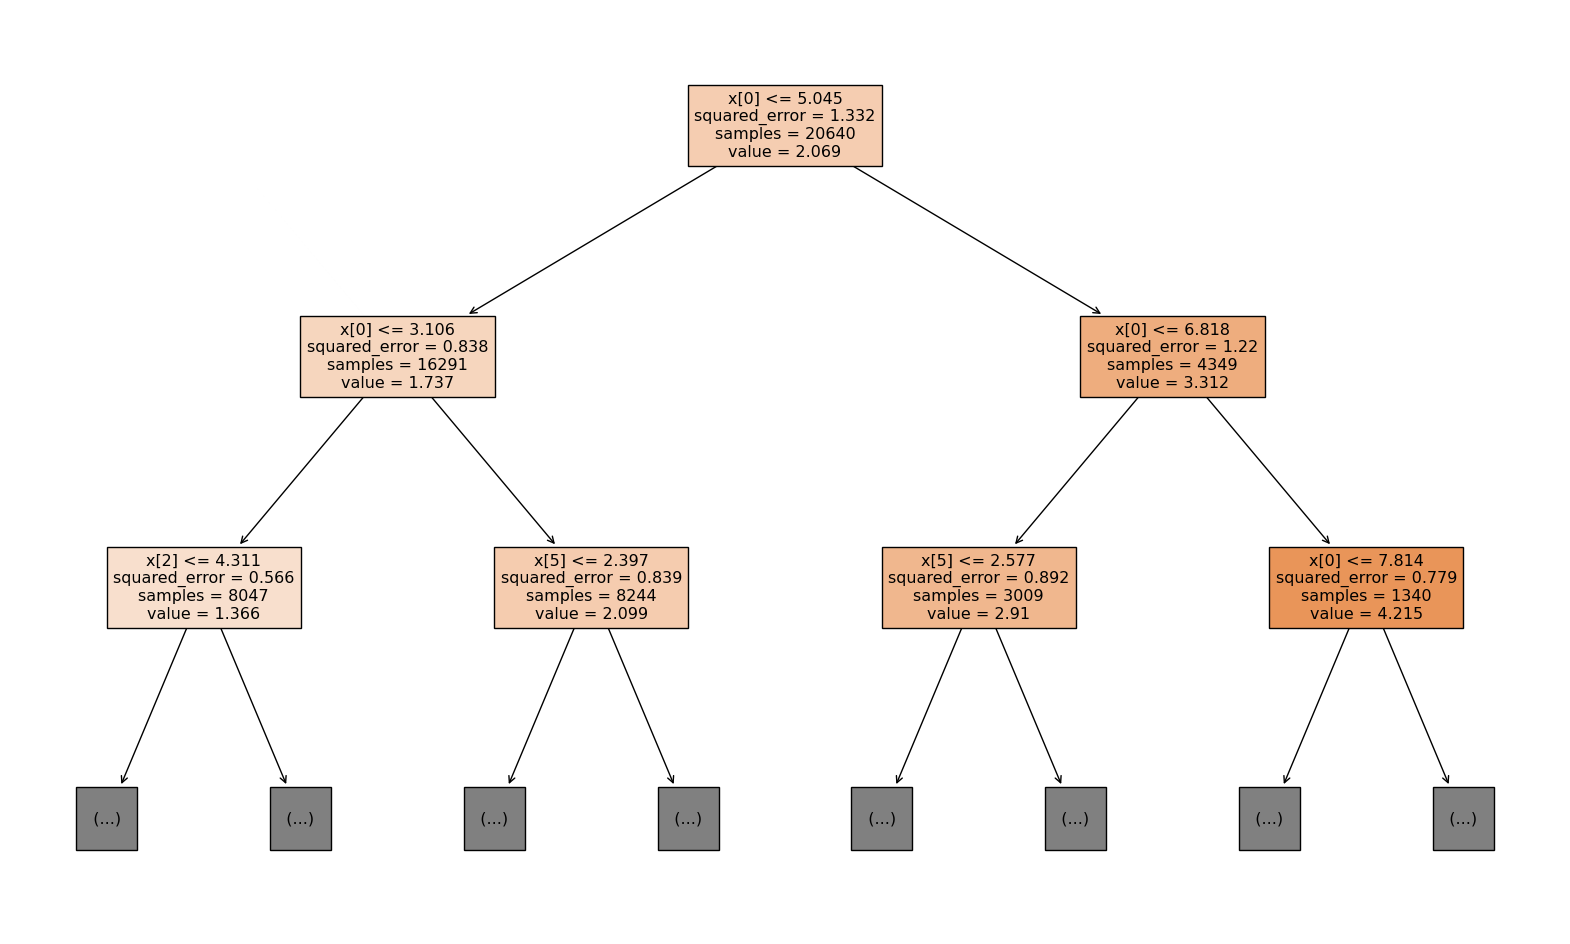

In [74]:
plt.figure(figsize=(20, 12))
plot_tree(tree_depth, max_depth=2, filled=True);

In [87]:
for i in range(1, 5000, 50):
    tree_reg = DecisionTreeRegressor(random_state=1, min_samples_leaf=i).fit(data, y)
    print(f"{i}: ", tree_reg.score(X_test, y_test))

1:  1.0
51:  0.7561738085304839
101:  0.7139249236858782
151:  0.6894433998493712
201:  0.6678466644479287
251:  0.6522848800519656
301:  0.6379067188198154
351:  0.6335514704063666
401:  0.6279355728500972
451:  0.6204058119874313
501:  0.6138556673210767
551:  0.6082160127765052
601:  0.5991961255210025
651:  0.5875197127509808
701:  0.5788799552604543
751:  0.5779724618467401
801:  0.572666408220802
851:  0.56513977560561
901:  0.5539337483634834
951:  0.5524343353509444
1001:  0.5502506875153537
1051:  0.5420213567822001
1101:  0.5375576357382799
1151:  0.5368276234258296
1201:  0.5362557085988167
1251:  0.531678633827682
1301:  0.5315398310210524
1351:  0.5308151854704295
1401:  0.5298759783519091
1451:  0.516779268542255
1501:  0.5161192050530921
1551:  0.5161192050530921
1601:  0.516964299823292
1651:  0.513590115535249
1701:  0.5030710453780924
1751:  0.5030710453780924
1801:  0.504355201061542
1851:  0.5031785803817013
1901:  0.5013023990113044
1951:  0.5000021388138977
2001: 

## Выводы
По итогам предыдущего задания, точность Линейной регрессии удалось повысить с 0.58 до 0.65, при этом были удалены признаки с высокой корреляцией, логарифмирован призак населения, были созданы новые признаки, а категориальные признаки - разбиты в бинарный вариант.  
С деревьями все обстояло немного иначе. Само по себе дерево без дополнительных манипуляций дает точность 1, что говорит о том, что модель обвела каждый параметр и переобучилась. Для оптимизации необходимо корректировать максимальную глубину дерева или количество элементов в листе.  
В случае, когда устанавливаем максимальную длину, то экспериментально получаем глубину 11, которая дает точность примерно 0.85, что в целом приемлемо. Когда устанавливаем количество элементов в листе, то все сложнее: точность будет выше, чем меньше будет элементов. 

Теперь вопрос о применимости:  
Дерево нельзя использовать для предсказаний прошлого и будущего значения, так как оно работает только с теми значениями, которые есть сейчас. Поэтому для этих целей, лучше всего использовать именно линейную регрессию. 